# <center>Jupyter Notebook Demo</center>

## <center>Introduction</center>

Assumptions:
    
 - You have been exposed to Python
   - Data types: lists, dictionaries, strings, floats, etc.
   - Basics about functions, classes, etc.
        
During this demo, you will be exposed to:
    
 - *Jupyter*, a web-based interactive computational environment (hint: you're lookin' at it)
 - *Numpy*, the fundamental package for scientific computing in Python.  (array data type, libraries for linear algebra, Fourier transforms, etc.)
 - *Matplotlib*, a 2D plotting library for Python.
 - *ObsPy*, an open-source project dedicated to provide a Python framework for processing seismological data.

## <center>A Little IPython History</center>

 python terminal => IPython terminal => massive re-write of IPython => ipython kernel + Jupyter notebook
    
Connect to that kernel through: 
    
 - the command line
 - the Jupyter notebook (browser)
 - GUI terminal
 - ...

## <center>Getting Started</center>

First of all, you need Python, plus some other stuff that makes it interesting for scientists.  

I recommend Anaconda from Continuum Analytics. http://continuum.io/downloads

There are other sources for "scientific" Python distributions, listed here: http://www.scipy.org/install.html

Once IPython is installed, you need to start it up:

    jupyter notebook
    

## <center>Cells</center>

This is a markdown *cell*.

This is the second line.

The cell below is a *code* cell with a "magic" command - in this case, one that tells matplotlib to draw its figures inline with the notebook.

In [46]:
%matplotlib inline

The markdown cell below is where I'm importing all of the modules I'll need for the rest of the demonstration.

In [71]:
#these imports are from the standard library
import datetime
import urllib
import json

#these imports are from 3rd party libraries, which you should always take note of
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import numexpr as ne
from mapio.shake import ShakeGrid
from obspy.clients.neic import Client
from obspy.imaging.beachball import beach
from obspy import UTCDateTime
from obspy import read
import cartopy.crs as ccrs

In [48]:
#This is a code cell
foo = 3
print(foo)
print('hello')

3
hello


## <center>Plotting</center>

Ok, so now what can we do?  How about making a simple scatter plot?

Make some random data:

In [49]:
x = np.random.rand(300,1) #this results in a Numpy array - more on this later
y = np.random.rand(300,1)

Now just plot it:

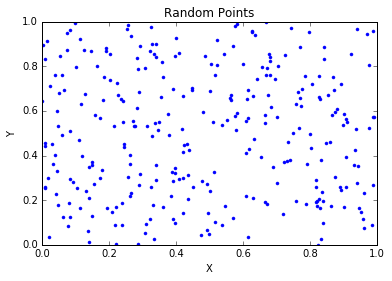

In [50]:
plt.plot(x,y,'b.')
th = plt.title('Random Points')
xl = plt.xlabel('X')
yl = plt.ylabel('Y')

## <center>More Plotting</center> <center> <em>or</em> </center>  <center>How Not To Do Loss Modeling</center>

Python has modules available for most relational database systems.  Here we're retrieving some data from a spreadsheet, using the *pandas* package.

/Users/mhearne/miniconda3/envs/notebooks/lib/python3.5/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


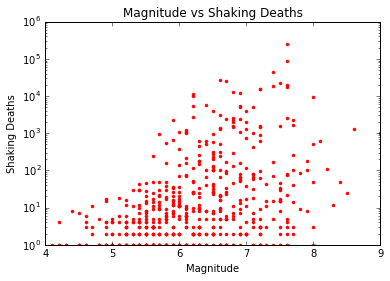

In [51]:
dataframe = pd.read_csv('EXPO_CAT_2007_12.csv')

mags = dataframe.PAGER_prefMag
deaths = dataframe.PAGER_prefShakingDeaths

plt.semilogy(mags,deaths,'r.')
plt.axis([4,9,0,1e6])
xl=plt.xlabel('Magnitude')
yl=plt.ylabel('Shaking Deaths')
tl=plt.title('Magnitude vs Shaking Deaths')

...and this is why we don't model fatalities this way!

## <center>Working with Numpy Arrays</center>

Let's explore the difference between a <em>list</em> (a standard Python data type) and a <em>numpy</em> array.<br/>
In Python, a list is a (potentially) heterogeneous collection of data.  A numpy array is (generally) a homogenous array of numbers, with the same data type.  Arithmetic operations can be applied to all elements of the array with one line.

In [52]:
x = [1,'two',3,'four'] # a python heterogeneous list
y = [1,2,3,4,5] #a homogenous python list
z = np.array(y) #this is a numpy array, created with a list as input

#To multiply every element in a list by 5, you have to loop over the list
for i in range(0,len(y)):
    y[i] = y[i] * 5

print(y)




[5, 10, 15, 20, 25]


## <center>Optimization</center>

There are a number of packages and methods for optimizing Python code.  Here is a very basic progression.

#### Looping over two lists of a million values and doing calculations on each element

In [53]:
a = range(0,1000000)
b = range(0,1000000)
t1 = datetime.datetime.now()
for i in range(0,len(a)):
    a[i]**2 + b[i]**2 + 2*a[i]*b[i]
t2_list = datetime.datetime.now()
list_elapsed = (t2_list-t1).microseconds/1e6
print('Looping over list: %.2e seconds' % (list_elapsed))

Looping over list: 2.38e-01 seconds


#### Vectorizing with numpy

In [54]:
a = np.arange(1e6)
b = np.arange(1e6)
t1 = datetime.datetime.now()
a**2 + b**2 + 2*a*b
t2_array = datetime.datetime.now()
array_elapsed = (t2_array-t1).microseconds/1e6
tfactor = (list_elapsed/array_elapsed)
print('Numpy array: %.2e seconds (%.1fx speedup)' % (array_elapsed,tfactor))

Numpy array: 1.84e-02 seconds (12.9x speedup)


#### Running on multiple cores with numexpr

In [55]:
t1 = datetime.datetime.now()
ne.evaluate("a**2 + b**2 + 2*a*b")
t2 = datetime.datetime.now()
expr_elapsed = (t2-t1).microseconds/1e6
tfactor = array_elapsed/expr_elapsed
print('numexpr eval: %.2e seconds (%.1fx speedup)' % (expr_elapsed,tfactor))

numexpr eval: 4.83e-03 seconds (3.8x speedup)


## <center>Grid Data (ShakeMaps)</center>

What about getting a ShakeMap grid?

*ShakeGrid* is a class that holds a ShakeMap grid XML file

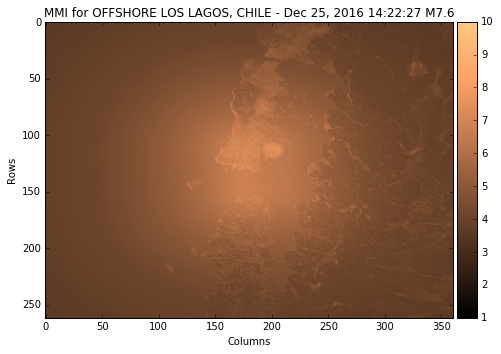

In [78]:
variable = 'mmi'
shakefile = 'us10007mn3_grid.xml'
shakemap = ShakeGrid.load(shakefile)
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1.0,1.0])
p = plt.imshow(shakemap.getLayer(variable).getData(),cmap='copper',vmin=1,vmax=10)
attributes = shakemap.getEventDict()
plt.xlabel('Columns')
plt.ylabel('Rows')
locstr = attributes['event_description']
mag = attributes['magnitude']
datestr = attributes['event_timestamp'].strftime('%b %d, %Y %H:%M:%S')
th = plt.title('%s for %s - %s M%.1f' % (variable.upper(),locstr,datestr,mag))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

ch=plt.colorbar(p, cax=cax);

## <center>ObsPy - Python for Seismologists</center>

*obspy* is a Python package which provides tools to access, process, and visualize seismological data.

Let's use the IRIS client to fetch some data.  Waveform data is organized into Streams.  From the obspy website:

>Streams are list-like objects which contain multiple Trace objects, i.e. gap-less continuous time series and related header/meta information.

*Note: The upcoming version of ObsPy will include a client for the NEIC waveform servers.* 

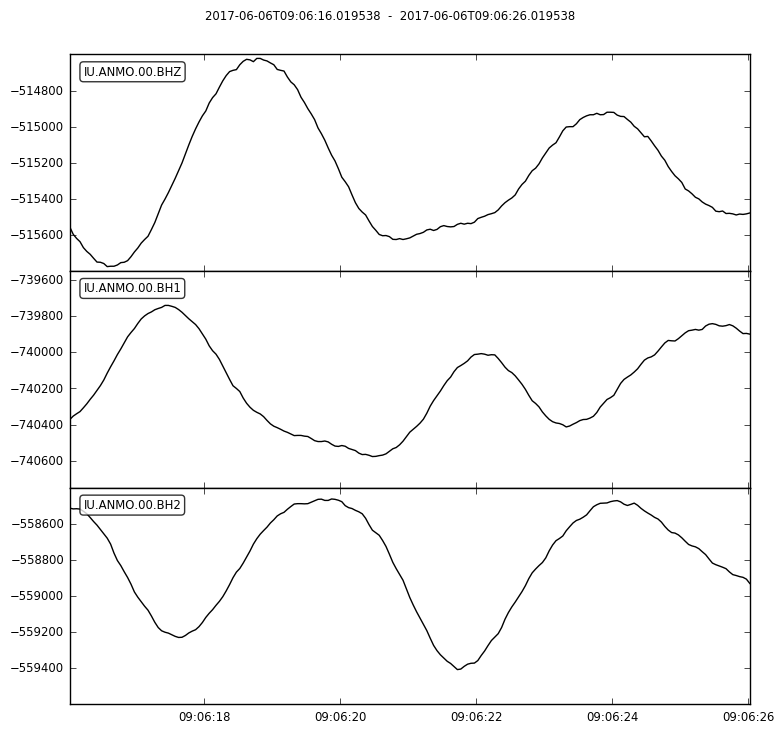

In [81]:
t = UTCDateTime() - 5 * 3600  # 5 hours before now
try:
    client = Client()
    stream = client.get_waveforms("IU", "ANMO", "00", "BH?", t, t + 10);
except Exception as e:
    stream = read("example.mseed")

fig = plt.figure(figsize=(12,4));
ph = stream.plot();

We can also make beachball plots...

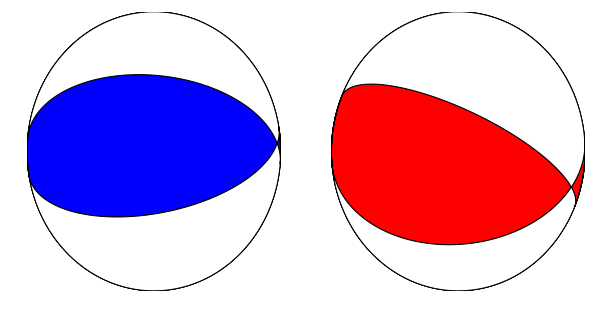

In [58]:
f, axeslist = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(10)
focmecs = [[80, 50, 80], [85, 30, 65]]
colors = ['b','r']
for i in range(len(focmecs)):
    b = beach(focmecs[i], xy=(0.5, 0.5), width=1, linewidth=1,facecolor=colors[i])
    b.set_zorder(10)
    axeslist[i].add_collection(b)
    axeslist[i].axis('off')

Let's make a map of the world with some beachballs on it.

First we need to write a quick function to get the last 30 days's worth of focal mechanisms.  

To do this, we'll pull down the last 7 days of events from the web site, and extract the strike, 
dip and rake values for those events which have had a moment tensor generated for them.

In [59]:
def getRecentFM():
    feed7 = 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_week.geojson'
    feed30 = 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.geojson'
    fh = urllib.request.urlopen(feed30)
    data = fh.read().decode('utf-8')
    fh.close()
    jdict = json.loads(data)
    focals = []
    for event in jdict['features']:
        etypes = event['properties']['types'].strip(',').split(',')
        if 'moment-tensor' in etypes or 'focal-mechanism' in etypes:
            lon,lat,depth = event['geometry']['coordinates']
            eurl = event['properties']['detail']
            fh = urllib.request.urlopen(eurl)
            edata = fh.read().decode('utf-8')
            fh.close()
            edict = json.loads(edata)
            props = edict['properties']['products']
            if 'nodal-plane-1-strike' not in props['moment-tensor'][0]['properties']:
                continue
            strike = float(props['moment-tensor'][0]['properties']['nodal-plane-1-strike'])
            dip = float(props['moment-tensor'][0]['properties']['nodal-plane-1-dip'])
            if 'nodal-plane-1-rake' in props['moment-tensor'][0]['properties']:
                rake = float(props['moment-tensor'][0]['properties']['nodal-plane-1-rake'])
            else:
                rake = float(props['moment-tensor'][0]['properties']['nodal-plane-1-slip'])
            focals.append((lat,lon,strike,dip,rake))
    return focals

In [60]:
eventlist = getRecentFM()

In [61]:
len(eventlist)

71

Now that we have some events to plot, let's set up a map with Cartopy.  Cartopy is a mapping extension to the matplotlib package

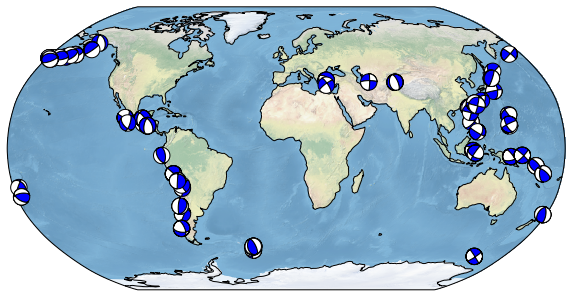

In [82]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

geocrs = ccrs.PlateCarree()

for event in eventlist:
    lat,lon = event[0:2]
    strike,dip,rake = event[2:]
    x,y = ax.projection.transform_point(lon,lat,geocrs)
    b = beach((strike,dip,rake), xy=(x,y), width=1e6, linewidth=1)
    b.set_zorder(100)
    ax.add_collection(b)


## <center>Other Possible Topics:</center>

- SymPy : Symbolic math package - like Mathematica
- More on Pandas: Implementation of R-like Data Frame object, also reads/writes Excel well (!)
- More detailed overview of ObsPy - triggers, picks, etc.
- Scipy modules for:
    - statistics
    - function optimization
    - interpolation
    - Fourier transforms
    - signal processing
    - linear algebra
    - machine learning (Bayesian, logistic regression, etc., etc.)
    

## <center>Debugging using IPython console</center>

Using the IPython console for debugging Python code:

Start IPython in a Terminal window by typing *ipython*.

Run your top level Python script by typing: *run -d program.py*

You should see something that looks like this:

<pre>*** Blank or comment
*** Blank or comment
*** Blank or comment
NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> /Users/user/src/python/program.py(3)<module>()
      1 #!/usr/bin/env python
      2 
----> 3 import sys
      5 
</pre> 

There are a number of commands that you can use at this point.  Each one has a 
short and a long form, which I will indicate like this:

*b(reak)* indicating that you could type either *b* or *break*.  If you have a variable 
called *b*, then you will need to type *break*.  Try not to have single character variables (excepting *i,j,k*)!




### <center>Setting and clearing breakpoints</center>

You can set a *breakpoint* at a given line number in the file by doing:

*b(reak)* [file:]lineno[,condition]

So, for example, to set a breakpoint at line 25 in the program.py file above, you would type:

*b 25*

If line 25 is in the middle of a loop, and you want to stop on the 7th iteration of i, you can do this:

*b 25, i==6*

If you want to stop in a module that is *called* by program.py, you can do that too:

*b /path/to/othermodule.py:17*

The breakpoints will be numbered in the order that you have created them.  To clear a breakpoint, type:

*cl(ear) breakpointno*



### <center>Continuing execution</center>

To continue running to a breakpoint or the end of the program, whichever comes first, type:

*c(ontinue)*

To step to the next line in the program, type:

*n(ext)*

To step into a function, type:

*s(tep)*

*Note:  If the function call takes multiple lines, *s* will only work on the last line of the call, like this:

x = foo(arg1,

        arg2,
        
        arg3) <- *s* will only work here
        


### <center>Printing, listing, and quitting</center>

To print the value of a variable, you can either type:

*p(rint) varname*

or just

*varname*

unless varname is p, in which case you would have to type *print p*.  Also see above admonition about single character variables.

To see the lines of code in the code you are currently debugging, type:

l(ist) [lineno]

To exit the debugger (but not IPython), type:

q(uit)

To exit IPython, (after quitting debugging session), you can type:

*exit*

or 

*Ctrl-D*